## Global Mart Sale Analysis

## Project Objectives
Customer Analysis: Analyze the distribution of orders and sales across different regions and segments.

Sales Analysis: Identify top-selling products, evaluate sales growth, and determine monthly sales trends.

Shipping Analysis: Assess the frequency and sales associated with different shipping methods.

## Description of Data

Data Source: https://www.kaggle.com/datasets/ankitbansal06/retail-orders

Attributes of Orders table: 

- order_id: ID number for an order
- order_date: Date that the order was placed
- ship_mode: Method of shipment (Standard Class, First Class, Second Class, Same Day, or Unknown)
- segment: The use of the orderd product (Consumer: personal use, Corporate: business use, Home Office: Work from home use )
- country: The country that the order was placed in
- city: The city that the order was placed in
- state: The state that the order was placed in
- postal_code: The postal code of the user that placed the order
- region: The region that the order was placed in
- category: The broad type of product that was purchased (Technolgy, Furniture, or Office Supplies)
- sub_category: Classification of product within each category
- product_id: ID for a given product
- cost_price: The amount the product costs for company to purchase from suppliers
- list_price: The amount the product is up for sale by the company
- discount_percent: The percent discount of the product

## Summary of Progress
Data Loading and Cleaning:

- Loaded data from CSV file into a pandas DataFrame.
- Filled missing values and standardized the ship_mode column.
- Added new calculated columns: discount, sale_price, and profit.
- Converted order_date to datetime format.
- Removed unnecessary columns for analysis.

Data Storage: Stored cleaned data into an SQLite database for efficient querying.

Customer Analysis: 

- Analyzed the number of orders by region and visualized the results using a bar chart.
- Calculated total sales by region and visualized the results using a bar chart.
- Analyzed the number of orders by segment and visualized the results using a bar chart.
- Calculated total sales by segment and visualized the results using a bar chart

Sales Analysis:

- Identified the top 10 highest revenue-generating products and visualized the results using a horizontal bar chart.
- Found the top 5 highest selling products in each region and visualized the results using grouped horizontal bar charts.
- Analyzed month-to-month sales growth from 2022 to 2023 and visualized the comparison using a line chart.
- Determined the month with the highest sales for each category and visualized the results using a bar chart.
- Calculated and visualized sales by sub-category using a horizontal bar chart.
- Identified sub-categories with the highest growth from 2022 to 2023 and visualized the results using a horizontal bar chart.

Shipping Analysis: 

- Analyzed the frequency of orders by shipping mode and visualized the results using a bar chart
- Calculated total sales by shipping mode and visualized the results using a bar chart.


### Loading & Cleaning Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("orders.csv")
df.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [3]:
# Checking NULL values for each column
df.isnull().sum()

Order Id            0
Order Date          0
Ship Mode           1
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Category            0
Sub Category        0
Product Id          0
cost price          0
List Price          0
Quantity            0
Discount Percent    0
dtype: int64

In [4]:
# Checking unique values for each Ship Mode
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'Not Available', 'unknown',
       'First Class', nan, 'Same Day'], dtype=object)

In [5]:
# Changing "Not Available" and NULL values to "Unknown" in Ship Mode
df["Ship Mode"] = df["Ship Mode"].fillna("Unknown")
df["Ship Mode"] = df["Ship Mode"].replace({"unknown": "Unknown", "Not Available": "Unknown"})

In [6]:
# No more NULL values
df.isnull().sum()

Order Id            0
Order Date          0
Ship Mode           0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Category            0
Sub Category        0
Product Id          0
cost price          0
List Price          0
Quantity            0
Discount Percent    0
dtype: int64

In [7]:
# Checking unique values for Ship Mode
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'Unknown', 'First Class',
       'Same Day'], dtype=object)

In [8]:
# Making all columns lower case and filling spaces with underscores for readability
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:
df.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [10]:
# Calculating the amount of money discounted from the listing price, final sale price, and the company profit
df["discount"] = df["list_price"] * df["discount_percent"] * .01
df["sale_price"] = df["list_price"] - df["discount"]
df["profit"] = df["sale_price"] * df["cost_price"] 

- discount: The amount of money that is deducted from the original listing price
- sale_price: The amount of money that the product is up for sale after discount
- profit: The amount of money the company gained after buying and selling product

In [11]:
# Checking data types of all columns
df.dtypes

order_id              int64
order_date           object
ship_mode            object
segment              object
country              object
city                 object
state                object
postal_code           int64
region               object
category             object
sub_category         object
product_id           object
cost_price            int64
list_price            int64
quantity              int64
discount_percent      int64
discount            float64
sale_price          float64
profit              float64
dtype: object

In [12]:
# Changing "order_date" to DateTime object for easier time series analysis
df["order_date"] = pd.to_datetime(df["order_date"], format="%Y-%m-%d")

In [13]:
# Dropping useless columns
df = df.drop(columns=["list_price", "cost_price", "discount_percent"])

In [14]:
# Final look at DF before analysis
df.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,61152.0
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,424860.0
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,95.0
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,733824.0
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,380.0


In [45]:
# Exporting to CSV
df.to_csv("cleaned_orders.csv")

### Loading DataFrame into Database

In [15]:
# Connecting to Database
conn = sqlite3.connect("global_mart.db")
c = conn.cursor()

In [16]:
# Loading DF into "orders" table in "global_mart" database
df.to_sql('orders', conn, if_exists='replace', index=False)

9994

### Customer Analysis

In [17]:
# Total Purchases by Region
c.execute(''' 
SELECT region, COUNT(order_id) as frequency
FROM orders
GROUP BY region      
ORDER BY frequency DESC
''')
rows = c.fetchall()
print(f"{'Region':<10} | {'Frequency':>10}")
print("-" * 25)
for row in rows:
  region, frequency = row
  print(f"{region:<10} | {frequency:>10}")

Region     |  Frequency
-------------------------
West       |       3203
East       |       2848
Central    |       2323
South      |       1620


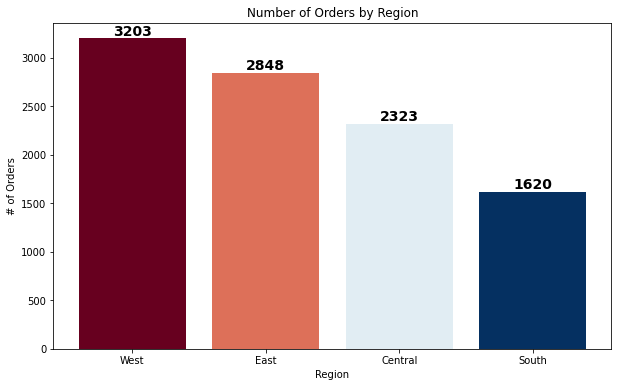

In [18]:
regions = [row[0] for row in rows]
frequencies = [row[1] for row in rows]

norm = plt.Normalize(min(frequencies), max(frequencies))
palette = sns.color_palette("RdBu_r", as_cmap=True)
colors = palette(norm(frequencies))

plt.figure(figsize=(10, 6))
bars = plt.bar(regions, frequencies, color=colors)

plt.xlabel('Region')
plt.ylabel('# of Orders')
plt.title('Number of Orders by Region')

for bar, freq in zip(bars, frequencies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', fontsize=14, fontweight="bold", ha="center")  


In [19]:
# Total Sales by Region
c.execute(''' 
SELECT region, SUM(sale_price) as sales
FROM orders
GROUP BY region
ORDER BY sales DESC
''')
rows = c.fetchall()
print(f"{'Region':<10} | {'Sales':>10}")
print("-" * 25)
for row in rows:
    region, sales = row
    print(f"{region:<10} | {sales:>10.2f}")

Region     |      Sales
-------------------------
West       |  699858.60
East       |  654320.00
Central    |  483668.60
South      |  378011.50


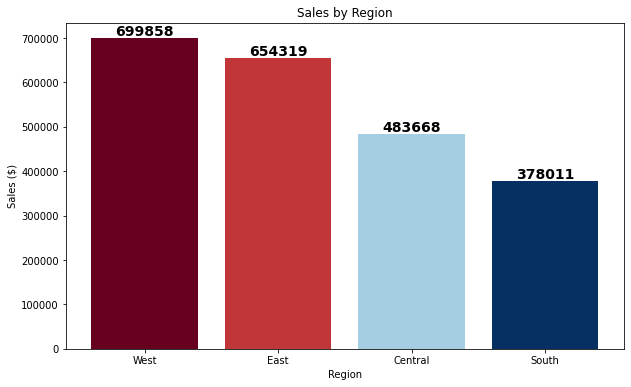

In [20]:
regions = [row[0] for row in rows]
sales = [row[1] for row in rows]

norm = plt.Normalize(min(sales), max(sales))

palette = sns.color_palette("RdBu_r", as_cmap=True)
colors = palette(norm(sales))

plt.figure(figsize=(10, 6))
bars = plt.bar(regions, sales, color=colors)

plt.xlabel('Region')
plt.ylabel('Sales ($)')
plt.title('Sales by Region')

for bar, sale in zip(bars, sales):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', fontsize=14, fontweight="bold", ha="center")  

plt.show()

In [21]:
# Number of Orders by Segment
c.execute(''' 
SELECT segment, COUNT(order_id) AS frequency
FROM orders
GROUP BY segment
ORDER BY frequency DESC
''')
rows = c.fetchall()
print(f"{'Segment':<15} | {'# of Orders':>10}")
print("-" * 28)
for row in rows:
    segment, frequency = row
    print(f"{segment:<15} | {frequency:>10.2f}")

Segment         | # of Orders
----------------------------
Consumer        |    5191.00
Corporate       |    3020.00
Home Office     |    1783.00


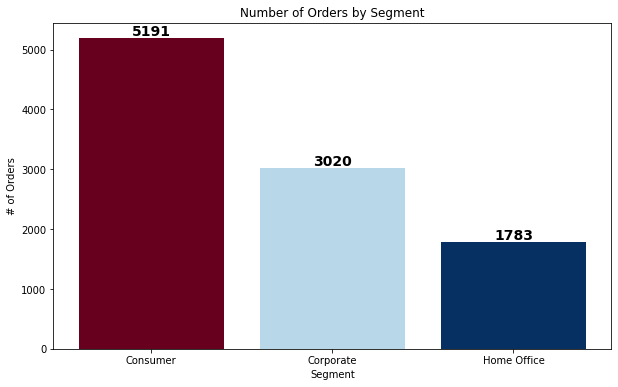

In [22]:
segment = [row[0] for row in rows]
frequencies = [row[1] for row in rows]

norm = plt.Normalize(min(frequencies), max(frequencies))
palette = sns.color_palette("RdBu_r", as_cmap=True)
colors = palette(norm(frequencies))

plt.figure(figsize=(10, 6))
bars = plt.bar(segment, frequencies, color=colors)
plt.xlabel('Segment')
plt.ylabel('# of Orders')
plt.title('Number of Orders by Segment')

for bar, freq in zip(bars, frequencies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', fontsize=14, fontweight="bold", ha="center")  

plt.show()

In [23]:
# Total Sales by Segment
c.execute(''' 
SELECT segment, SUM(sale_price) AS sales
FROM orders
GROUP BY segment
ORDER BY sales DESC
''')
rows = c.fetchall()
print(f"{'Segment':<15} | {'Sales':>10}")
print("-" * 28)
for row in rows:
    segment, sales = row
    print(f"{segment:<15} | {sales:>10.2f}")

Segment         |      Sales
----------------------------
Consumer        | 1119696.00
Corporate       |  681657.70
Home Office     |  414505.00


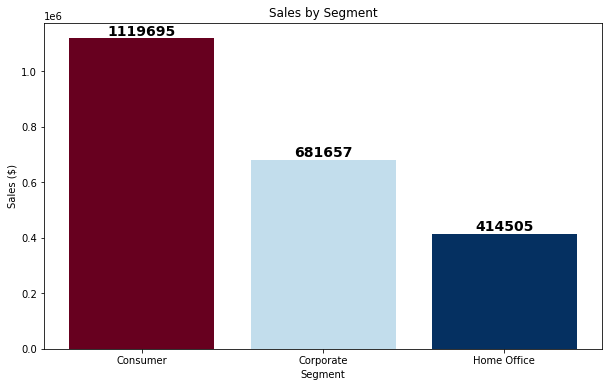

In [24]:
segment = [row[0] for row in rows]
sales = [row[1] for row in rows]

norm = plt.Normalize(min(sales), max(sales))
palette = sns.color_palette("RdBu_r", as_cmap=True)
colors = palette(norm(sales))

plt.figure(figsize=(10, 6))
bars = plt.bar(segment, sales, color=colors)
plt.xlabel('Segment')
plt.ylabel('Sales ($)')
plt.title('Sales by Segment')

for bar, sale in zip(bars, sales):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', fontsize=14, fontweight="bold", ha="center")  

plt.show()

### Sales Analysis

In [25]:
# Find Month to Month Growth Comparison from 2022 to 2023
c.execute(''' 
WITH cte AS(
SELECT strftime('%m', order_date) AS month, strftime('%Y', order_date) AS year, SUM(sale_price) AS sales
FROM orders
GROUP BY month, year)
SELECT month, SUM(case when year = '2022' then sales else 0 end) AS sales_2022, 
          SUM(case when year = '2023' then sales else 0 end) AS sales_2023,
          SUM(CASE WHEN year = '2023' THEN sales ELSE 0 END) - SUM(CASE WHEN year = '2022' THEN sales ELSE 0 END) AS sales_diff
FROM cte
GROUP BY month
ORDER BY month
''')
rows = c.fetchall()
print(f"{'Month':<5} | {'Sales 2022':<10} | {'Sales 2023':<10} | {'Sales Difference':<10}")
print("-" * 50)
for row in rows:
    month, sales_2022, sales_2023, sales_diff = row
    print(f"{month:<5} | {sales_2022:>10.2f} | {sales_2023:>10.2f} | {sales_diff:>10.2f}")

Month | Sales 2022 | Sales 2023 | Sales Difference
--------------------------------------------------
01    |   94712.50 |   88632.60 |   -6079.90
02    |   90091.00 |  128124.20 |   38033.20
03    |   80106.00 |   82512.30 |    2406.30
04    |   95451.60 |  111568.60 |   16117.00
05    |   79448.30 |   86447.90 |    6999.60
06    |   94170.50 |   68976.50 |  -25194.00
07    |   78652.20 |   90563.80 |   11911.60
08    |  104808.00 |   87733.60 |  -17074.40
09    |   79142.20 |   76658.60 |   -2483.60
10    |  118912.70 |  121061.50 |    2148.80
11    |   84225.30 |   75432.80 |   -8792.50
12    |   95869.90 |  102556.10 |    6686.20


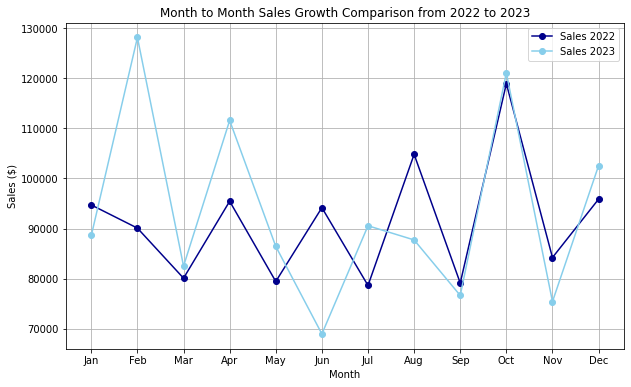

In [26]:
months = [row[0] for row in rows]
sales_2022 = [row[1] for row in rows]
sales_2023 = [row[2] for row in rows]
month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(10, 6))
plt.plot(months, sales_2022, marker='o', color = "darkblue", label='Sales 2022')
plt.plot(months, sales_2023, marker='o', color = "skyblue", label='Sales 2023')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.title('Month to Month Sales Growth Comparison from 2022 to 2023')
plt.xticks(ticks=months, labels=month_labels) 
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


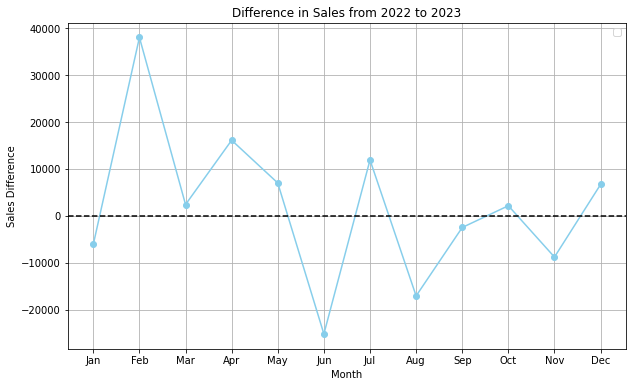

In [27]:
months = [row[0] for row in rows]
sales_diff = [row[3] for row in rows]
month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(10, 6))
plt.plot(months, sales_diff, marker='o', color = "skyblue")

plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel('Month')
plt.ylabel('Sales Difference')
plt.title('Difference in Sales from 2022 to 2023')
plt.xticks(ticks=months, labels=month_labels) 
plt.legend()
plt.grid(True)
plt.show()

In [28]:
c.execute(''' 
WITH cte AS(
SELECT strftime('%Y', order_date) AS year, SUM(sale_price) AS sales
FROM orders
GROUP BY year)
SELECT SUM(case when year = '2022' then sales else 0 end) AS sales_2022, 
          SUM(case when year = '2023' then sales else 0 end) AS sales_2023
FROM cte
''')
rows = c.fetchall()
print(f"{'Sales 2022':<10} | {'Sales 2023':<10}")
print("-" * 23)
for row in rows:
    sales_2022, sales_2023 = row
    print(f"{sales_2022:>10.2f} | {sales_2023:>10.2f}")

Sales 2022 | Sales 2023
-----------------------
1095590.20 | 1120268.50


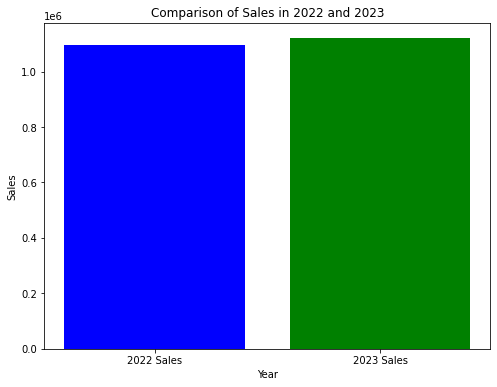

In [29]:
sales_2022 = rows[0][0]
sales_2023 = rows[0][1]

plt.figure(figsize=(8, 6))
plt.bar(['2022 Sales', '2023 Sales'], [sales_2022, sales_2023], color=['blue', 'green'])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Comparison of Sales in 2022 and 2023')

plt.show()


In [30]:
# Which month had the highest sales for each category?
c.execute(''' 
with cte as (SELECT category, strftime('%Y', order_date) || '-' || strftime('%m', order_date) AS year_month, SUM(sale_price) AS sales
FROM orders
GROUP BY year_month)
SELECT * FROM (
SELECT *, row_number() OVER(PARTITION BY category ORDER BY sales) AS rn
FROM cte
)
WHERE rn = 1
''')

rows = c.fetchall()
print(f"{'Category':<15} | {'Year-Month':<10} | {'Sales':<10}")
print("-" * 39)
for row in rows:
    category, year_month, sales, _ = row
    print(f"{category:<15} | {year_month:<10} | {sales:<10.2f}")

Category        | Year-Month | Sales     
---------------------------------------
Furniture       | 2022-03    | 80106.00  
Office Supplies | 2023-11    | 75432.80  
Technology      | 2023-06    | 68976.50  


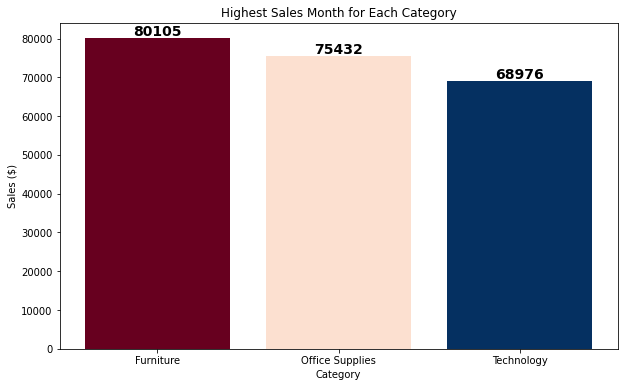

In [31]:
categories = [row[0] for row in rows]
months = [row[1] for row in rows]
sales = [row[2] for row in rows]

norm = plt.Normalize(min(sales), max(sales))
palette = sns.color_palette("RdBu_r", as_cmap=True)
colors = palette(norm(sales))

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, sales, color=colors)
plt.xlabel('Category')
plt.ylabel('Sales ($)')
plt.title('Highest Sales Month for Each Category')

for bar, sale in zip(bars, sales):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', fontsize=14, fontweight="bold", ha="center")  

plt.show()

In [32]:
# Top 10 Highest Revenue Generating Products
c.execute('''SELECT product_id, category, sub_category, sum(sale_price) 
          AS sales 
          FROM orders 
          GROUP BY product_id, category, sub_category 
          ORDER BY sales DESC LIMIT 10''')
rows = c.fetchall()
print(f"{'Product ID':<15} | {'Category':<20} | {'Sub-category':<20} | {'Sales':<10}")
print("-" * 72)
for row in rows:
    product_id, category, sub_category, sales = row
    print(f"{product_id:<15} | {category:<20} | {sub_category:<20} | {sales:<10.2f}")

Product ID      | Category             | Sub-category         | Sales     
------------------------------------------------------------------------
TEC-CO-10004722 | Technology           | Copiers              | 59514.00  
OFF-BI-10003527 | Office Supplies      | Binders              | 26525.30  
TEC-MA-10002412 | Technology           | Machines             | 21734.40  
FUR-CH-10002024 | Furniture            | Chairs               | 21096.20  
OFF-BI-10001359 | Office Supplies      | Binders              | 19090.20  
OFF-BI-10000545 | Office Supplies      | Binders              | 18249.00  
TEC-CO-10001449 | Technology           | Copiers              | 18151.20  
TEC-MA-10001127 | Technology           | Machines             | 17906.40  
OFF-BI-10004995 | Office Supplies      | Binders              | 17354.80  
OFF-SU-10000151 | Office Supplies      | Supplies             | 16325.80  


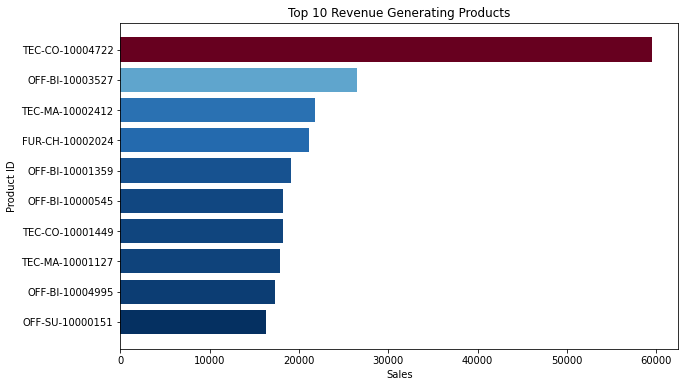

In [33]:
product_ids = [row[0] for row in rows]
sales = [row[3] for row in rows]

norm = plt.Normalize(min(sales), max(sales))
palette = sns.color_palette("RdBu_r", as_cmap=True)
colors = palette(norm(sales))

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(product_ids, sales, color=colors)
plt.xlabel('Sales')
plt.ylabel('Product ID')
plt.title('Top 10 Revenue Generating Products')
plt.gca().invert_yaxis()

plt.show()

In [34]:
# Find the Top 5 Highest Selling Products in Each Region
c.execute('''
WITH cte AS (
    SELECT region, product_id, category, sub_category, sum(sale_price) AS sales
    FROM orders
    GROUP BY product_id, region
)
SELECT *
FROM (
    SELECT *,
           row_number() OVER (PARTITION BY region ORDER BY sales DESC) AS rn
    FROM cte
)
WHERE rn <= 5
''') 
rows = c.fetchall()
print(f"{'Region':<10} | {'Product ID':<15} | {'Category':<15} | {'Sub-category':<15} | {'Sales':<10}")
print("-" * 75)
for row in rows:
    region, product_id, category, sub_category, sales, _ = row
    print(f"{region:<10} | {product_id:<15} | {category:<15} | {sub_category:<15} | {sales:<10.2f}")


Region     | Product ID      | Category        | Sub-category    | Sales     
---------------------------------------------------------------------------
Central    | TEC-CO-10004722 | Technology      | Copiers         | 16975.00  
Central    | TEC-MA-10000822 | Technology      | Machines        | 13770.00  
Central    | OFF-BI-10001120 | Office Supplies | Binders         | 11056.50  
Central    | OFF-BI-10000545 | Office Supplies | Binders         | 10132.70  
Central    | OFF-BI-10004995 | Office Supplies | Binders         | 8416.10   
East       | TEC-CO-10004722 | Technology      | Copiers         | 29099.00  
East       | TEC-MA-10001047 | Technology      | Machines        | 13767.00  
East       | FUR-BO-10004834 | Furniture       | Bookcases       | 11274.10  
East       | OFF-BI-10001359 | Office Supplies | Binders         | 8463.60   
East       | TEC-CO-10001449 | Technology      | Copiers         | 8316.00   
South      | TEC-MA-10002412 | Technology      | Machines        |

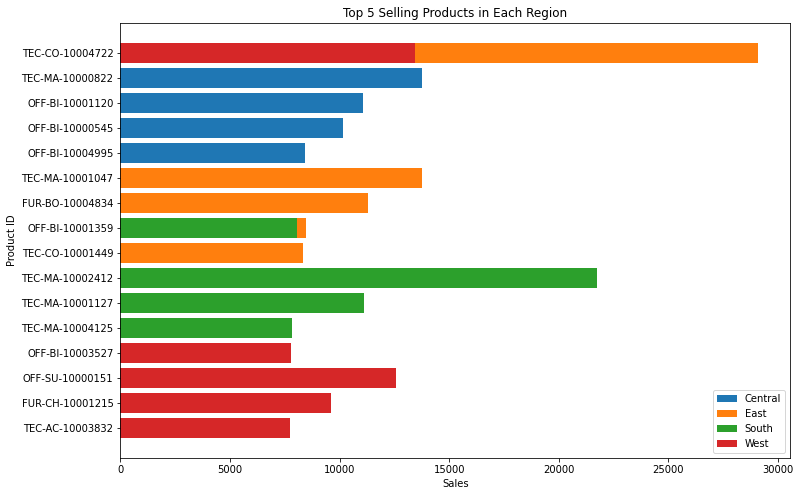

In [35]:
regions = np.unique([row[0] for row in rows])
products_by_region = {region: [] for region in regions}
sales_by_region = {region: [] for region in regions}

for row in rows:
    region, product_id, _, _, sales, _ = row
    products_by_region[region].append(product_id)
    sales_by_region[region].append(sales)

plt.figure(figsize=(12, 8))
for region in regions:
    plt.barh(products_by_region[region], sales_by_region[region], label=region)

plt.xlabel('Sales')
plt.ylabel('Product ID')
plt.title('Top 5 Selling Products in Each Region')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

In [36]:
# Sales by Sub Category
c.execute(''' 
SELECT sub_category, SUM(sale_price) AS sales
FROM orders
GROUP BY sub_category
ORDER BY sales DESC
''')
rows = c.fetchall()
print(f"{'Sub-category':<15} | {'Sales':>10}")
print("-" * 28)
for row in rows:
    sub_category, sales = row
    print(f"{sub_category:<15} | {sales:>10.2f}")

Sub-category    |      Sales
----------------------------
Phones          |  318008.30
Chairs          |  316825.10
Storage         |  215908.00
Tables          |  199361.20
Binders         |  196038.60
Machines        |  182901.70
Accessories     |  161604.60
Copiers         |  144358.90
Bookcases       |  110816.10
Appliances      |  103697.70
Furnishings     |   88338.30
Paper           |   75831.30
Supplies        |   45058.10
Art             |   26259.80
Envelopes       |   15917.20
Labels          |   11994.90
Fasteners       |    2938.90


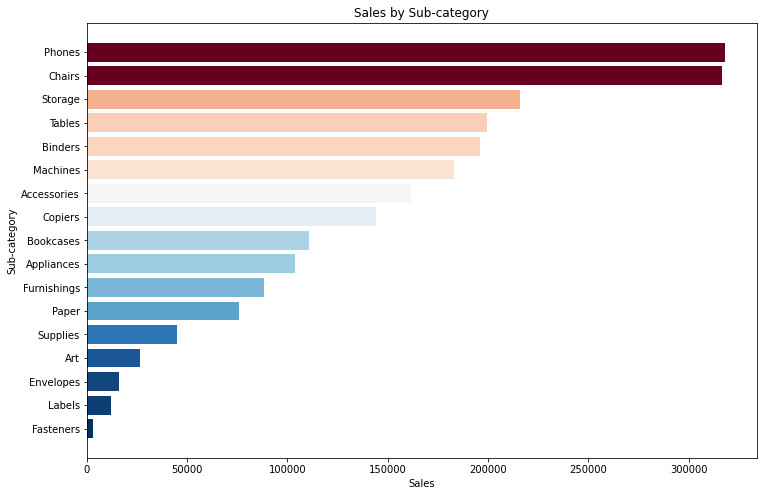

In [37]:
sub_categories = [row[0] for row in rows]
sales = [row[1] for row in rows]

norm = plt.Normalize(min(sales), max(sales))
palette = sns.color_palette("RdBu_r", as_cmap=True)
colors = palette(norm(sales))

plt.figure(figsize=(12, 8))
plt.barh(sub_categories, sales, color=colors)
plt.xlabel('Sales')
plt.ylabel('Sub-category')
plt.title('Sales by Sub-category')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest sales at the top
plt.show()

In [38]:
# Which sub category had the highest growth in from 2022 to 2023
c.execute(''' 
WITH cte AS(
SELECT sub_category, strftime('%Y', order_date) AS year, SUM(sale_price) AS sales
FROM orders
GROUP BY sub_category, year), 
cte2 AS (
SELECT sub_category, SUM(case when year = '2022' then sales else 0 end) AS sales_2022, SUM(case when year = '2023' then sales else 0 end) AS sales_2023
FROM cte
GROUP BY sub_category)
SELECT *, ROUND(sales_2023-sales_2022)*100/sales_2022 AS growth_rate
FROM cte2
ORDER BY growth_rate DESC
''')
rows = c.fetchall()
print(f"{'Sub-category':<15} | {'Sales 2022':<10} | {'Sales 2023':<10} | {'Growth (%)':<10}")
print("-" * 54)
for row in rows:
    sub_category, sales_2022, sales_2023, growth_rate = row
    print(f"{sub_category:<15} | {sales_2022:>10.2f} | {sales_2023:>10.2f} | {growth_rate:>10.2f}")

Sub-category    | Sales 2022 | Sales 2023 | Growth (%)
------------------------------------------------------
Supplies        |   16140.70 |   28917.40 |      79.16
Machines        |   73723.20 |  109178.50 |      48.09
Binders         |   87675.50 |  108363.10 |      23.60
Storage         |  102907.40 |  113000.60 |       9.81
Chairs          |  151395.30 |  165429.80 |       9.27
Accessories     |   77627.20 |   83977.40 |       8.18
Bookcases       |   53469.50 |   57346.60 |       7.25
Fasteners       |    1430.10 |    1508.80 |       5.52
Phones          |  157334.70 |  160673.60 |       2.12
Paper           |   38898.90 |   36932.40 |      -5.06
Art             |   13644.10 |   12615.70 |      -7.53
Labels          |    6329.60 |    5665.30 |     -10.49
Furnishings     |   47816.20 |   40522.10 |     -15.25
Envelopes       |    8767.20 |    7150.00 |     -18.44
Tables          |  111305.90 |   88055.30 |     -20.89
Copiers         |   82090.30 |   62268.60 |     -24.15
Appliances

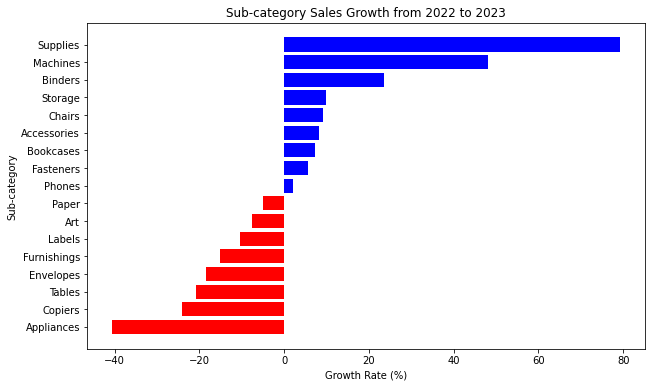

In [39]:
sub_categories = [row[0] for row in rows]
growth_rates = [row[3] for row in rows]

colors = ['blue' if rate > 0 else 'red' for rate in growth_rates]

plt.figure(figsize=(10, 6))
bars = plt.barh(sub_categories, growth_rates, color=colors)

plt.xlabel('Growth Rate (%)')
plt.ylabel('Sub-category')
plt.title('Sub-category Sales Growth from 2022 to 2023')
plt.gca().invert_yaxis()  

plt.show()

In [40]:
c.execute(''' 
SELECT ship_mode, COUNT(order_id) AS frequency
FROM orders
GROUP BY ship_mode
ORDER BY frequency DESC
''')
rows = c.fetchall()
print(f"{'Ship Mode':<15} | {'# of Orders':>10}")
print("-" * 28)
for row in rows:
    ship_mode, frequency = row
    print(f"{ship_mode:<15} | {frequency:>10}")

Ship Mode       | # of Orders
----------------------------
Standard Class  |       5962
Second Class    |       1945
First Class     |       1538
Same Day        |        543
Unknown         |          6


### Shipping Method Analysis

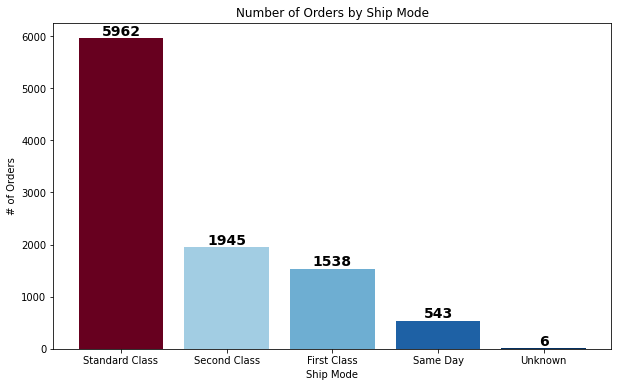

In [41]:
ship_modes = [row[0] for row in rows]
frequencies = [row[1] for row in rows]

norm = plt.Normalize(min(frequencies), max(frequencies))
palette = sns.color_palette("RdBu_r", as_cmap=True)
colors = palette(norm(frequencies))

plt.figure(figsize=(10, 6))
bars = plt.bar(ship_modes, frequencies, color=colors)
plt.xlabel('Ship Mode')
plt.ylabel('# of Orders')
plt.title('Number of Orders by Ship Mode')

for bar, freq in zip(bars, frequencies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', fontsize=14, fontweight="bold", ha="center")  

plt.show()

In [42]:
c.execute(''' 
SELECT ship_mode, SUM(sale_price) AS sales
FROM orders
GROUP BY ship_mode
ORDER BY sales DESC
''')
rows = c.fetchall()
print(f"{'Ship Mode':<15} | {'Sales':>10}")
print("-" * 28)
for row in rows:
    ship_mode, sales = row
    print(f"{ship_mode:<15} | {sales:>10.2f}")

Ship Mode       |      Sales
----------------------------
Standard Class  | 1307065.10
Second Class    |  442976.10
First Class     |  339242.30
Same Day        |  123747.20
Unknown         |    2828.00


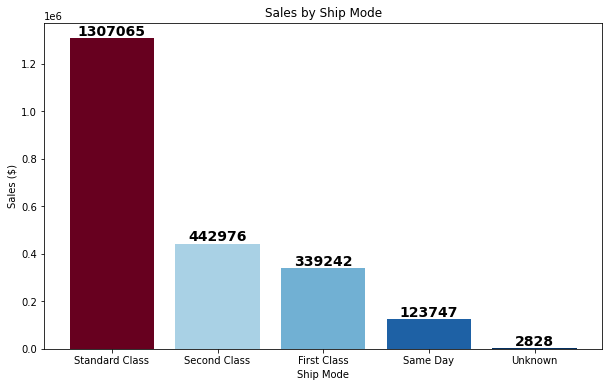

In [43]:
ship_modes = [row[0] for row in rows]
sales = [row[1] for row in rows]

norm = plt.Normalize(min(sales), max(sales))
palette = sns.color_palette("RdBu_r", as_cmap=True)
colors = palette(norm(sales))

plt.figure(figsize=(10, 6))
bars = plt.bar(ship_modes, sales, color=colors)
plt.xlabel('Ship Mode')
plt.ylabel('Sales ($)')
plt.title('Sales by Ship Mode')

for bar, sale in zip(bars, sales):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', fontsize=14, fontweight="bold", ha="center")  

plt.show()

In [44]:
conn.close()

## Findings

Customer Analysis: 
- The West generated the most sales followed by the East, Central, and the South.
- Regular consumers made up most of the sales followed by Corporate, and Home Office.

Sales Analysis:
- Sales in 2023 was about $40,000 higher in February than in 2022
- Sales in 2023 was about $25,000 lower in June than 2023
- Sales were much worse in the months of June, August, and October in 2023 compared to 2022
- Sales were much better in February, July, and April in 2023 in comparison to 2022
- Sales were slightly higher in 2023 in comparison to 2022

- A copier sells twice as much as the second highest revenue generating product (binder), most of which are purchased in East regions
- The South purchases more machines than any other product

- Supplies grew the most in revenue from 2022 to 2023
- Appliances regressed the most in revenue from 2022 to 2023

Shipping Method Analysis: The standard class generated the highest number of orders and sales, followed by second class, first class, and then same day.



## Recommendations

Customer Analysis:

Given that regular consumers make up the majority of sales, it might be beneficial to focus marketing efforts towards this segment, perhaps by offering loyalty programs or personalized discounts to encourage repeat purchases.
While the West region currently generates the highest sales, exploring strategies to increase sales in the South region could be worthwhile, as it has potential for growth.

Sales Analysis:

Identifying the seasonal patterns in sales, such as the dip in June, August, and October in 2023 compared to 2022, can help in better resource allocation and inventory management. Promoting products that are more useful in the summer time and offering discounts in the beginning stages of the rollout could drive sales.
Leveraging the insights about top-selling products and their regional preferences can inform product placement and marketing strategies. For example, focusing on promoting copiers in East regions where they sell significantly well can drive further sales growth.
Understanding the growth and regression trends in different product categories from 2022 to 2023 can guide product development efforts and resource allocation. Investing more in categories experiencing growth and reevaluating strategies for regressing categories can optimize sales performance.

Shipping Method Analysis:

Since the standard class shipping method generates the highest number of orders and sales, it's important to ensure its efficiency and reliability. Any improvements made in the standard shipping service can directly impact customer satisfaction and retention.
Exploring ways to optimize the second class and first-class shipping methods, such as reducing delivery times or offering incentives for customers to opt for faster shipping options, can help capture additional sales opportunities.